In [42]:
#import librerias necesarias

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew # para estadisticas


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # limitar flotantes a 3 decimales


from subprocess import check_output


## Carga del dataset, con encoding latin1

In [43]:
df = pd.read_csv(r'data\train.csv',encoding='latin-1')
df.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768,68y,1,0.688,2178.000,12,0,1,0,0.000
1,95356,0,0.290,52y,0,0.385,3750.000,16,0,1,0,1.000
2,108917,0,0.000,54y,0,0.347,6833.000,8,0,1,0,0.000
3,99039,0,0.046,66y,1,0.408,5200.000,6,0,1,0,1.000
4,116168,0,0.169,45y,0,4702.000,NaN,10,0,3,0,1.000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

Revolving Utilization of Unsecured Lines (RUUL) -- Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.

DebtRatio -- Monthly debt payments, alimony,living costs divided by monthy gross income

NumberOfOpenCreditLinesAndLoans

NumberOfTime30-59DaysPastDueNotWorse

MonthlyIncome

NumberOfTimes90DaysLate

NumberRealEstateLoansOrLines

NumberOfTime60-89DaysPastDueNotWorse

NumberOfDependents

age

# Data Visualization and Feature Engineering

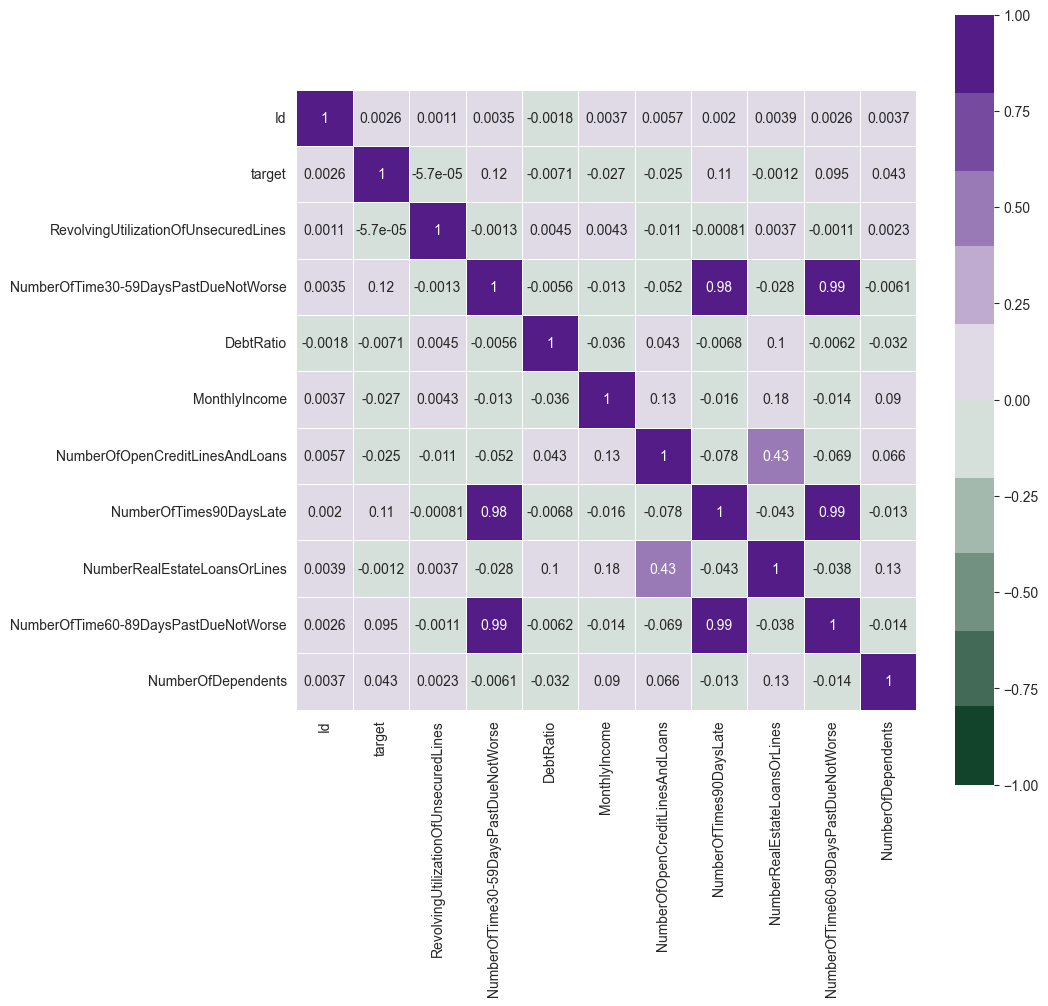

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [46]:
# Esta desbalanceado
df['target'].value_counts()

0    68527
1     4836
Name: target, dtype: int64

In [47]:
df['age'] = df['age'].str.replace('y', '').astype(int)


In [48]:
df.columns = df.columns.str.lower()

In [49]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df)

COL_N,id,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
DATA_TYPE,int64,int64,float64,int32,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.000,0.000,0.000,0.000,0.000,0.000,19.860,0.000,0.000,0.000,0.000,2.650
UNIQUE_VALUES,73363,2,62269,84,15,59279,10564,56,17,24,12,11
CARDIN (%),100.000,0.000,84.880,0.110,0.020,80.800,14.400,0.080,0.020,0.030,0.020,0.010


In [50]:
# Luego de analizar la columna 'monthlyincome', decido quitarla por lo siguiente: 
# 1. Tiene muchos NaNs
# 2. HAy indicadores que la consideran, como el debtratio. 
# 3. No especifica si es ingreso bruto o neto
# Tambien quitamos la columna "id"
# df = df.drop(columns = 'monthlyincome')
df = df.drop(columns = 'id')
# df = df.drop(columns= 'numberofdependents')

In [51]:
df.describe()

,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
count,73363.000,73363.000,73363.000,73363.000,73363.000,58796.000,73363.000,73363.000,73363.000,73363.000,71421.000
mean,0.066,5.885,52.363,0.411,359.753,6649.145,8.444,0.257,1.020,0.232,0.756
std,0.248,235.508,14.781,4.090,2477.648,10461.631,5.142,4.067,1.136,4.052,1.112
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.030,41.000,0.000,0.173,3400.000,5.000,0.000,0.000,0.000,0.000
50%,0.000,0.155,52.000,0.000,0.366,5400.000,8.000,0.000,1.000,0.000,0.000
75%,0.000,0.559,63.000,0.000,0.864,8300.000,11.000,0.000,2.000,0.000,1.000
max,1.000,29110.000,105.000,98.000,329664.000,1560100.000,57.000,98.000,32.000,98.000,13.000


In [52]:
# df['numberofdependents'].describe()

In [53]:
# df['numberofdependents'].value_counts()

In [54]:
# df['numberofdependents'].mean()

In [55]:
mode_dependents = df['numberofdependents'].mode()[0]
df['numberofdependents'].fillna(mode_dependents, inplace=True)

In [56]:
df['monthlyincome'].fillna(df['monthlyincome'].quantile(0.75), inplace=True)

In [57]:
data_report(df)

COL_N,target,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
DATA_TYPE,int64,float64,int32,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
UNIQUE_VALUES,2,62269,84,15,59279,10564,56,17,24,12,11
CARDIN (%),0.000,84.880,0.110,0.020,80.800,14.400,0.080,0.020,0.030,0.020,0.010


**Chequeamos outliers**

In [58]:
# sns.boxplot(x=df["debtratio"])

In [59]:
# fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 8))
# sns.boxplot(df, x='age', ax=axs[0,1])
# sns.boxplot(df, x='numberofopencreditlinesandloans', ax=axs[1,0])
# sns.boxplot(df, x='revolvingutilizationofunsecuredlines', ax=axs[0,0])
# sns.boxplot(df, x='numberofdependents', ax=axs[1,1])
# sns.boxplot(df, x='numberoftimes90dayslate', ax=axs[2,0])
# sns.boxplot(df, x='numberrealestateloansorlines', ax=axs[2,1])
# axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
# axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
# axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
# axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
# axs[1, 1].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=90)
# axs[1, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=90);

In [60]:
# temp = df.groupby(['target']).mean().reset_index().sort_values(by='age',ascending=False)
# plt.figure(figsize = (2,2))
# splot = sns.barplot(data = temp,x = 'target', y = 'age',palette = 'RdBu')
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# plt.xlabel("target", size=14)
# plt.ylabel("Age", size=14)
# plt.title('Promedio de la edad por target')

## Correlaciones

In [61]:
corr = np.abs(df.corr()['target']).sort_values(ascending=True)
print(corr)

revolvingutilizationofunsecuredlines   0.000
numberrealestateloansorlines           0.001
debtratio                              0.007
numberofopencreditlinesandloans        0.025
monthlyincome                          0.026
numberofdependents                     0.044
numberoftime60-89dayspastduenotworse   0.095
numberoftimes90dayslate                0.110
age                                    0.114
numberoftime30-59dayspastduenotworse   0.118
target                                 1.000
Name: target, dtype: float64


In [62]:
# Variables numericas vs target categórico
# sns.pairplot(df,
#             kind='scatter',
#             hue='target');

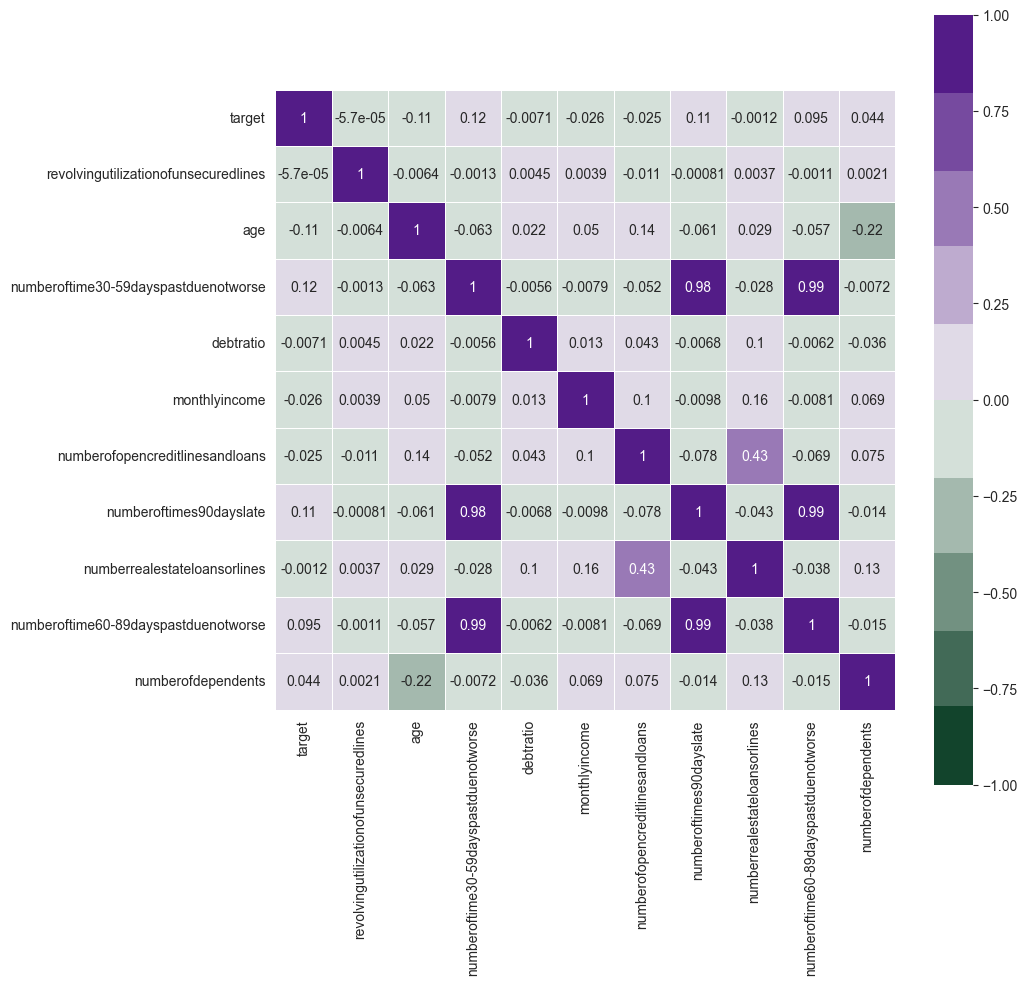

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [64]:
df = df.drop(columns = [ 'numberoftime30-59dayspastduenotworse','numberoftime60-89dayspastduenotworse'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                73363 non-null  int64  
 1   revolvingutilizationofunsecuredlines  73363 non-null  float64
 2   age                                   73363 non-null  int32  
 3   debtratio                             73363 non-null  float64
 4   monthlyincome                         73363 non-null  float64
 5   numberofopencreditlinesandloans       73363 non-null  int64  
 6   numberoftimes90dayslate               73363 non-null  int64  
 7   numberrealestateloansorlines          73363 non-null  int64  
 8   numberofdependents                    73363 non-null  float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 4.8 MB


In [66]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy=1)
X_ros, y_ros = ros.fit_resample(df.loc[:, df.columns != 'target'], df['target'])

In [67]:
X_ros = pd.DataFrame(X_ros, columns=df.loc[:, df.columns != 'target'].columns)
y_ros = pd.DataFrame(y_ros, columns=['target'])
df_ros = pd.concat([X_ros, y_ros], axis=1)
df_ros['target'].value_counts()
df = df_ros
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137054 entries, 0 to 137053
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   revolvingutilizationofunsecuredlines  137054 non-null  float64
 1   age                                   137054 non-null  int32  
 2   debtratio                             137054 non-null  float64
 3   monthlyincome                         137054 non-null  float64
 4   numberofopencreditlinesandloans       137054 non-null  int64  
 5   numberoftimes90dayslate               137054 non-null  int64  
 6   numberrealestateloansorlines          137054 non-null  int64  
 7   numberofdependents                    137054 non-null  float64
 8   target                                137054 non-null  int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 8.9 MB


In [68]:
X_ros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137054 entries, 0 to 137053
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   revolvingutilizationofunsecuredlines  137054 non-null  float64
 1   age                                   137054 non-null  int32  
 2   debtratio                             137054 non-null  float64
 3   monthlyincome                         137054 non-null  float64
 4   numberofopencreditlinesandloans       137054 non-null  int64  
 5   numberoftimes90dayslate               137054 non-null  int64  
 6   numberrealestateloansorlines          137054 non-null  int64  
 7   numberofdependents                    137054 non-null  float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 7.8 MB


In [69]:
df.to_csv('Train_processed.csv', index=False)

# Model Building

In [70]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression




In [71]:
X = df.drop('target', axis=1)
y = df['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [73]:
# Ejemplo de código para un StandardScaler
from sklearn.preprocessing import StandardScaler

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scaler = StandardScaler()
scaler.fit(X_train)

# # Utilizo los datos de train para escalar train y test.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Score del modelo (accuracy): 0.658
Accuracy score: 0.658
Recall score: 0.664
Precision score: 0.633
F1 score: 0.648
AUC: 0.659


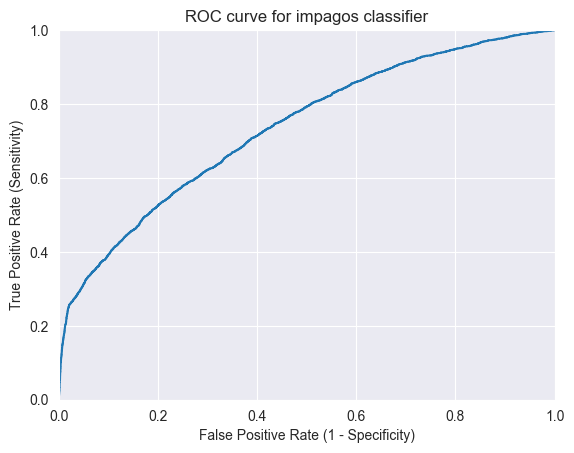

In [74]:
# Metricas de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix


lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
preds = lr.predict(X_test_scaled)

print("Score del modelo (accuracy):", round(lr.score(X_test_scaled, y_test), 3))
print("Accuracy score:", round(accuracy_score(preds, y_test), 3))
print("Recall score:", round(recall_score(preds, y_test), 3))
print("Precision score:", round(precision_score(preds, y_test), 3))
print("F1 score:", round(f1_score(preds, y_test), 3))
print("AUC:", round(roc_auc_score(preds, y_test), 3))


y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for impagos classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [75]:
# # Metricas de clasificación
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
#                             roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix


# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# preds = lr.predict(X_test)

# print("Score del modelo (accuracy):", round(lr.score(X_test, y_test), 3))
# print("Accuracy score:", round(accuracy_score(preds, y_test), 3))
# print("Recall score:", round(recall_score(preds, y_test), 3))
# print("Precision score:", round(precision_score(preds, y_test), 3))
# print("F1 score:", round(f1_score(preds, y_test), 3))
# print("AUC:", round(roc_auc_score(preds, y_test), 3))


# y_pred_prob = lr.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.plot(fpr, tpr)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.title('ROC curve for impagos classifier')
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.grid(True)

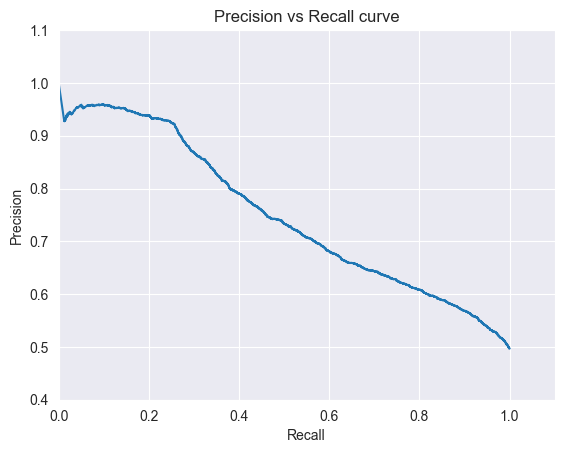

In [76]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlim([0.0, 1.1])
plt.ylim([0.4, 1.1])
plt.title('Precision vs Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True);

[[11790  5451]
 [ 6255 10768]]


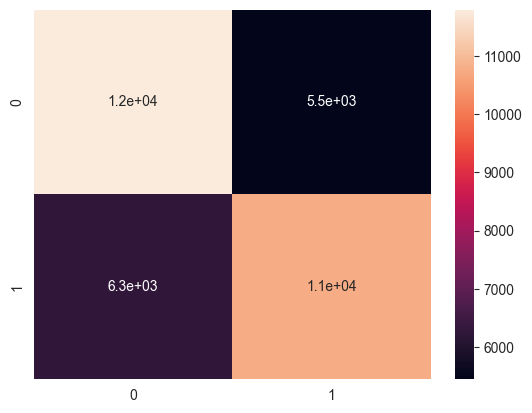

In [77]:
c_matrix = confusion_matrix(y_test, preds)
print(c_matrix)
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

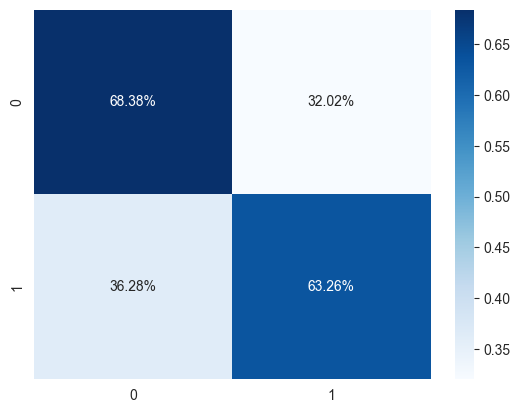

In [78]:
sns.heatmap(c_matrix/np.sum(c_matrix,axis=1), annot=True, 
            fmt='.2%', cmap='Blues');